目标可视化工具专门用于直观地描述用于监督建模的因变量，通常称为y目标。当前实现了以下可视化：
+ 平衡箱可视化Balanced Binning：生成带有垂直线的直方图，垂直线显示推荐值点，以将数据装箱到均匀分布的箱中。
+ 类平衡Class Balance：可视化来检查目标，以显示每个类对最终估计器的支持。
+ 特征相关Feature Correlation：绘制特征和因变量之间的相关性。

头文件调用如下：
```
# Target Visualizers Imports
from yellowbrick.target import BalancedBinningReference
from yellowbrick.target import ClassBalance
from yellowbrick.target import FeatureCorrelatio
```

本文如果数据集下载不下来，查看下面地址，然后放入yellowbrick安装目录\datasets\fixtures文件夹:
```
{
  "bikeshare": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/bikeshare.zip",
    "signature": "4ed07a929ccbe0171309129e6adda1c4390190385dd6001ba9eecc795a21eef2"
  },
  "hobbies": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/hobbies.zip",
    "signature": "6114e32f46baddf049a18fb05bad3efa98f4e6a0fe87066c94071541cb1e906f"
  },
  "concrete": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/concrete.zip",
    "signature": "5807af2f04e14e407f61e66a4f3daf910361a99bb5052809096b47d3cccdfc0a"
  },
  "credit": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/credit.zip",
    "signature": "2c6f5821c4039d70e901cc079d1404f6f49c3d6815871231c40348a69ae26573"
  },
  "energy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/energy.zip",
    "signature": "174eca3cd81e888fc416c006de77dbe5f89d643b20319902a0362e2f1972a34e"
  },
  "game": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/game.zip",
    "signature": "ce799d1c55fcf1985a02def4d85672ac86c022f8f7afefbe42b20364fba47d7a"
  },
  "mushroom": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/mushroom.zip",
    "signature": "f79fdbc33b012dabd06a8f3cb3007d244b6aab22d41358b9aeda74417c91f300"
  },
  "occupancy": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/occupancy.zip",
    "signature": "0b390387584586a05f45c7da610fdaaf8922c5954834f323ae349137394e6253"
  },
  "spam": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/spam.zip",
    "signature": "000309ac2b61090a3001de3e262a5f5319708bb42791c62d15a08a2f9f7cb30a"
  },
  "walking": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/walking.zip",
    "signature": "7a36615978bc3bb74a2e9d5de216815621bd37f6a42c65d3fc28b242b4d6e040"
  },
  "nfl": {
    "url": "https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/nfl.zip",
    "signature": "4989c66818ea18217ee0fe3a59932b963bd65869928c14075a5c50366cb81e1f"
  }
}
```


# 1 平衡箱可视化Balanced Binning
通常，现实世界中的机器学习问题会受到维数诅咒的影响；训练实例比预期的要少，而且预测信号分布在许多不同的特征上。有时，当目标变量连续赋值时，根本没有足够的实例来预测这些值达到回归的精度。在这种情况下，我们有时可以将问题转化为连续的分类问题。

为了帮助用户选择最佳的仓位数量，BalancedBiningReference visualizer将目标变量y作为输入，并生成一个直方图，其中竖线表示建议的值点，以确保数据均匀地分布到每个仓位中。

|可视化器|BalancedBinningReference|
|-|-|
|快速使用方法|balanced_binning_reference()|
|模型|分类|
|工作流程|特征分析，目标分析，模型选择|


In [1]:
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1.1 基本使用
BalancedBinningReference实际就是应用numpy中的histogram进行数据可视化,histogram()会对区间中数组所对应的权值进行求和，bins决定分箱个数。关于numpy中的histogram函数具体见：
[numpy之histogram](https://blog.csdn.net/yangwangnndd/article/details/89489946)

In [2]:

from yellowbrick.datasets import load_concrete
from yellowbrick.target import BalancedBinningReference
import numpy as np
# Load the concrete dataset
X, y = load_concrete()

# Instantiate the visualizer
# 可视化器，求各个区间的平均值
visualizer = BalancedBinningReference(bins=5)

# Fit the data to the visualizer
# 拟合数据
a=visualizer.fit(y)
# 显示数据     
visualizer.show();       

<Figure size 800x550 with 1 Axes>

## 1.2 快速方法
上面的相同功能可以通过关联的快速方法来实现balanced_binning_reference。此方法将BalancedBinningReference使用关联的参数构建对象，将其拟合，然后（可选）立即显示它。


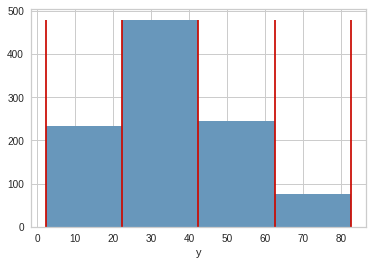

In [3]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import balanced_binning_reference

# Load the dataset
X, y = load_concrete()

# Use the quick method and immediately show the figure
balanced_binning_reference(y);

# 2 类平衡Class Balance
分类模型面临的最大挑战之一是训练数据中类的不平衡。严重的类不平衡可能被相对较好的F1和准确度分数掩盖-分类器只是猜测大多数类，而不对代表性不足的类进行任何评估。

有几种处理类不平衡的技术，例如分层抽样，对多数类进行下采样，加权等。但是，在采取这些措施之前，了解训练数据中的类平衡是什么很重要。ClassBalance visualizer通过为每个类创建支持的条形图来支持这一点，即数据集中类表示的频率。


|可视化器|ClassBalance|
|-|-|
|快速使用方法|class_balance()|
|模型|分类|
|工作流程|特征分析，目标分析，模型选择|

## 2.1 基本使用
结果图使我们能够诊断余额问题的严重性。 在此图中，我们可以看到“ win”类主导了其他两个类。 一种可能的解决方案是创建一个二进制分类器：“ win”与“ not win”，并将“ loss”和“ draw”类组合为一个类。ClassBalance函数的功能就是计算各个类下样本数。

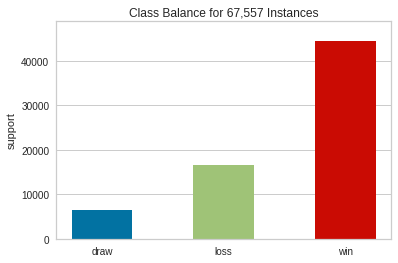

In [4]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
# 载入分类数据库
X, y = load_game()
# Instantiate the visualizer
# ClassBalance函数的功能就是计算各个类下样本数。
visualizer = ClassBalance(labels=["draw", "loss", "win"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

如果在评估期间必须保持类别不平衡(例如，被分类的事件实际上如频率所暗示的那样罕见)，则应使用分层抽样来创建训练和测试集。
这确保了测试数据与训练数据具有大致相同的类比例。虽然SCRICIT-LEARN默认在Train_Test_Split和其他cv方法中执行此操作，但是比较两个Split中每个类的支持情况可能是有用的。

ClassBalance可视化工具具有“比较”模式，在该模式下，可以将训练和测试数据传递给FIT()，从而创建并排条形图而不是单个条形图，如下所示：

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:752: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


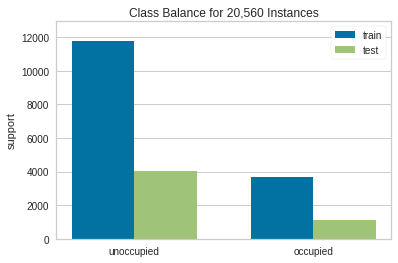

In [5]:
from sklearn.model_selection import TimeSeriesSplit

from yellowbrick.datasets import load_occupancy
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_occupancy()

# Create the training and test data
# 时间分割序列数据
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the visualizer
visualizer = ClassBalance(labels=["unoccupied", "occupied"])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show();

这种可视化使我们可以快速检查，以确保每个类在两个拆分中的比例大致相似。这种可视化应该是第一步，尤其是当评估指标在不同的分割中高度可变时。

## 2.2 快速使用

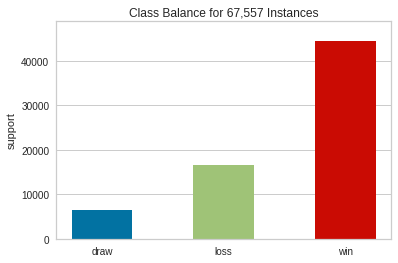

In [6]:
from yellowbrick.datasets import load_game
from yellowbrick.target import class_balance

# Load the dataset
X, y = load_game()

# Use the quick method and immediately show the figure
class_balance(y);

# 3 特征相关Feature Correlation
该可视化工具计算皮尔逊相关系数和特征与因变量之间的互信息。
这种可视化可以用于特征选择，以识别与因变量具有高相关性或大互信息的特征。

默认计算是Pearson相关性，这是使用scipy.stats.Pearsonr执行的。

|可视化器|FeatureCorrelation|
|-|-|
|快速使用方法|feature_correlation()|
|模型|回归/分类/聚类|
|工作流程|特征分析/模型选择|

## 3.1 Person分析
FeatureCorrelation通过method设置来确定分析方法，默认是person分析，除此之外还有mutual_info-regression，通过sklearn.feature_selection中的mutual_info-regression计算，还有mutual_info-classification，通过sklearn.feature_selection中的mutual_info_classif计算。

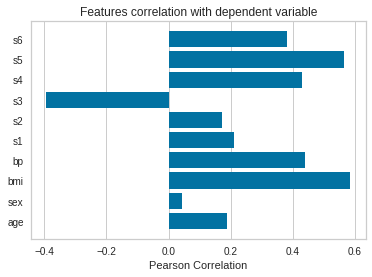

In [7]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression dataset
data = datasets.load_diabetes()
X, y = data['data'], data['target']

# Create a list of the feature names
features = np.array(data['feature_names'])

# Instantiate the visualizer
# 计算x中的每个特征与y的相关性
visualizer = FeatureCorrelation(labels=features)

# Fit the data to the visualizer
visualizer.fit(X, y)        
visualizer.show();

## 3.2 Mutual Information Regression分析
互信息详细见：[https://www.cntofu.com/book/48/shu-xue-ji-chu/xin-xi-lun/hu-xin-xi.md](https://www.cntofu.com/book/48/shu-xue-ji-chu/xin-xi-lun/hu-xin-xi.md)

互信息与相关性的区别见：[https://blog.csdn.net/gdanskamir/article/details/54913233](https://blog.csdn.net/gdanskamir/article/details/54913233)

但是回归中，连续数据需要转换为离散数据。特征和因变量之间的相互信息是使用sklearn.feature_selection.mutual_info_classifwhen method='mutual_info-classification'和mutual_info_regressionwhen 计算的method='mutual_info-regression'。在计算互信息时，指定离散特征非常重要，因为连续变量和离散变量的计算是不同的。sklearn中参考文档见[http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

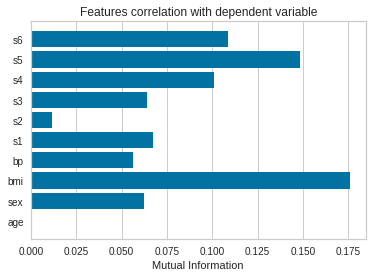

In [8]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation
import numpy as np

# Load the regression dataset
data = datasets.load_diabetes()
X, y = data['data'], data['target']

# Create a list of the feature names
features = np.array(data['feature_names'])

# Create a list of the discrete features
# 创建离散变量列表
discrete = [False for _ in range(len(features))]
# discrete为age需要变为离散变量
discrete[1] = True

# Instantiate the visualizer
visualizer = FeatureCorrelation(method='mutual_info-regression', labels=features)

visualizer.fit(X, y, discrete_features=discrete, random_state=0)
visualizer.show();

## 3.3 Mutual Information Classification分析
通过与pandas DataFrame配合，可以从列名称中自动获取功能标签。该可视化器还允许根据计算出互信息（或Pearson相关系数）对条形图进行排序，并通过指定特征名称或特征索引来选择要绘制的特征。

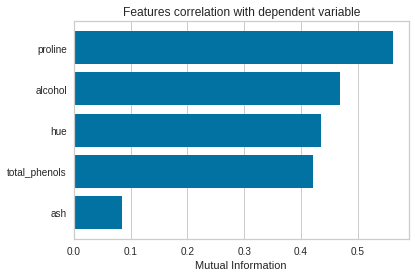

In [9]:
import pandas as pd

from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression dataset
# 导入分类数据
data = datasets.load_wine()
X, y = data['data'], data['target']
X_pd = pd.DataFrame(X, columns=data['feature_names'])

# Create a list of the features to plot
features = ['alcohol', 'ash', 'hue', 'proline', 'total_phenols']

# Instaniate the visualizer
# sort设置是否排序
visualizer = FeatureCorrelation(
    method='mutual_info-classification', feature_names=features, sort=True
)

visualizer.fit(X_pd, y)        # Fit the data to the visualizer
visualizer.show();

## 3.4 快速使用
上面的相同功能可以通过关联的快速方法来实现feature_correlation。此方法将FeatureCorrelation使用关联的参数构建对象，将其拟合，然后（可选）立即显示它

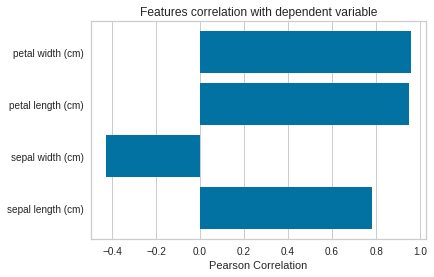

<Figure size 432x288 with 0 Axes>

In [10]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from yellowbrick.target.feature_correlation import feature_correlation

#Load the diabetes dataset
data = datasets.load_iris()
X, y = data['data'], data['target']

features = np.array(data['feature_names'])
visualizer = feature_correlation(X, y, labels=features)
plt.tight_layout();

# 4 参考
[https://www.scikit-yb.org/en/latest/api/target/binning.html](https://www.scikit-yb.org/en/latest/api/target/binning.html)

[https://www.scikit-yb.org/en/latest/api/target/class_balance.html](https://www.scikit-yb.org/en/latest/api/target/class_balance.html)

[https://blog.csdn.net/gdanskamir/article/details/54913233](https://blog.csdn.net/gdanskamir/article/details/54913233)

[https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html#yellowbrick.target.feature_correlation.FeatureCorrelation](https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html#yellowbrick.target.feature_correlation.FeatureCorrelation)